# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


    Data Description:
    Murder -- Muder rates in different places of United States
    Assualt- Assualt rate in different places of United States
    UrbanPop - urban population in different places of United States
    Rape - Rape rate in different places of United States

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm

# Import Data and EDA

In [2]:
cr=pd.read_csv("/Users/ayaskantsamal/Documents/EXCELR/assignments/crime_data.csv")
cr.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
cr.rename(columns={'Unnamed: 0':'US_States'},inplace=True)
cr.head()

,US_States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
cr1=cr.iloc[:,1:]
cr1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
cr.isna().sum()

US_States    0
Murder       0
Assault      0
UrbanPop     0
Rape         0
dtype: int64

In [6]:
dup=cr1[cr1.duplicated()]
print(dup)

Empty DataFrame
Columns: [Murder, Assault, UrbanPop, Rape]
Index: []


In [7]:
cr.shape

(50, 5)

In [8]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   US_States  50 non-null     object 
 1   Murder     50 non-null     float64
 2   Assault    50 non-null     int64  
 3   UrbanPop   50 non-null     int64  
 4   Rape       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
cr.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


# Applying Normalization on individual feature level

In [10]:
Murder_array=cr1["Murder"].values.reshape(-1,1)
Assault_array=cr1["Assault"].values.reshape(-1,1)
UrbanPop_array=cr1["UrbanPop"].values.reshape(-1,1)
Rape_array=cr1["Rape"].values.reshape(-1,1)


In [11]:
scaler=MinMaxScaler()

cr1["Murder"]=scaler.fit_transform(Murder_array)
cr1["Assault"]=scaler.fit_transform(Assault_array)
cr1["UrbanPop"]=scaler.fit_transform(UrbanPop_array)
cr1["Rape"]=scaler.fit_transform(Rape_array)

In [12]:
cr1.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Drawing Dendrogram

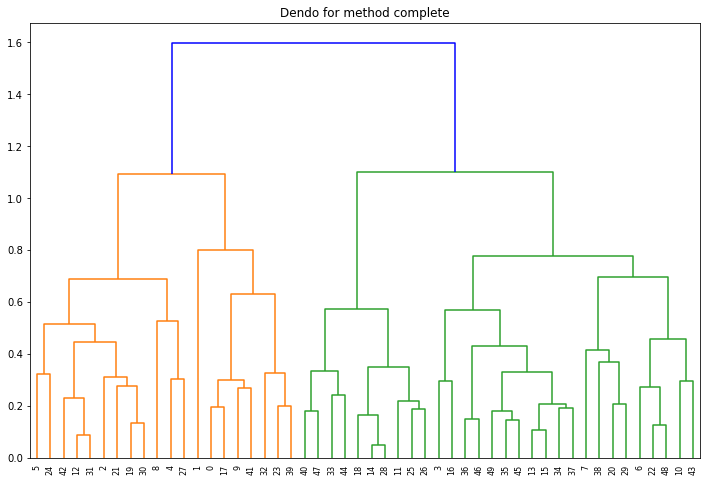

In [13]:
# drawing the dendogram (method is complete = Max (d1,d2))
plt.figure(figsize=(12,8))
plt.title("Dendo for method complete")

linkage=sch.linkage(cr1,method="complete")
dn_complete=sch.dendrogram(linkage,show_leaf_counts=True,above_threshold_color='b')

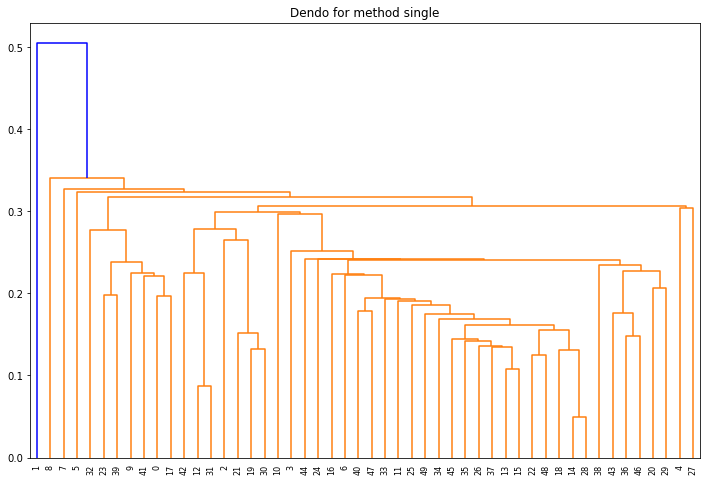

In [14]:
# drawing the dendogram (method is single = Min (d1,d2))
plt.figure(figsize=(12,8))

plt.title("Dendo for method single")

linkage=sch.linkage(cr1,method="single")
dn_single=sch.dendrogram(linkage,show_leaf_counts=True,above_threshold_color='b')

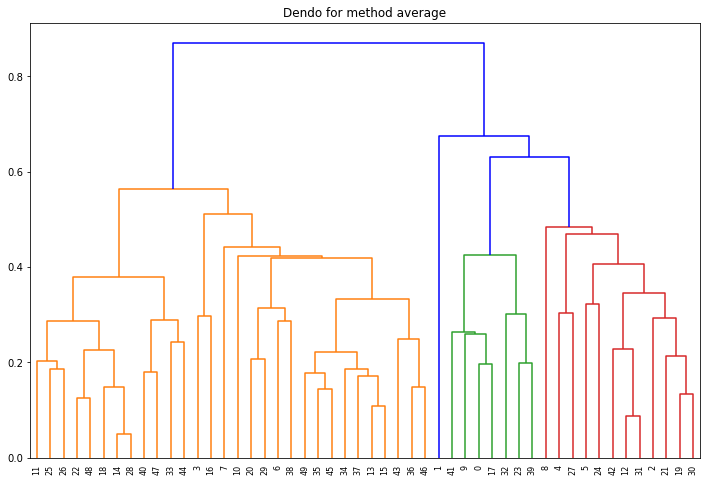

In [15]:
# drawing the dendogram (method is average = avg (d1,d2))
plt.figure(figsize=(12,8))

plt.title("Dendo for method average")

linkage=sch.linkage(cr1,method="average")
dn_avg=sch.dendrogram(linkage,show_leaf_counts=True,above_threshold_color='b')

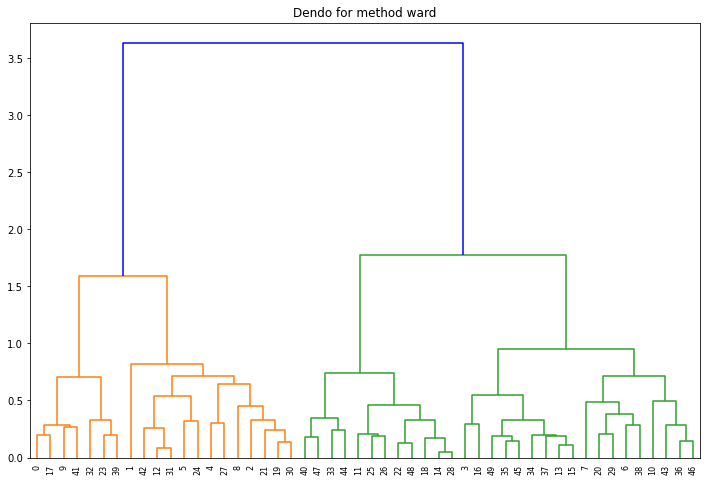

In [16]:
# drawing the dendogram (method is ward, Ward variance minimization algorithm checks variance betweeen diff clusters,
# ward=Vc1-Vc2-Vc3)
plt.figure(figsize=(12,8))

plt.title("Dendo for method ward")

linkage=sch.linkage(cr1,method="ward")
dn_ward=sch.dendrogram(linkage,show_leaf_counts=True,above_threshold_color='b')

### From the above we will use "complete","average" and "ward" & single method to in the agglomorative clustering

# Hirerchial Clustering

number of iteratons: 9
Maximum silhouette score is 0.4236 for optimal number of cluseters 2.


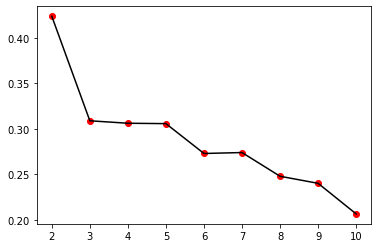

In [17]:
# linkage is complete

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

scores=[]
i=0
clt=[]

for cl in range(2,11):
    comp_cl=AgglomerativeClustering(n_clusters=cl,affinity='euclidean',linkage='complete', compute_distances=True)
    comp_cl_pred=comp_cl.fit_predict(cr1)
    score=silhouette_score(cr1,comp_cl_pred,metric='euclidean')
    scores.append(score)
    clt.append(cl)
    i=i+1
    
    if (score>=max(scores)):
        comp_cl_score=round(score,4)
        comp_cl_cluster=cl
        
print ("number of iteratons:", i)

print("Maximum silhouette score is {} for optimal number of cluseters {}.".format(comp_cl_score,comp_cl_cluster))


plt.plot(clt,scores,color="black")
plt.scatter(clt,scores,color="red")
plt.show() 

number of iteratons: 9
Maximum silhouette score is 0.2103 for optimal number of cluseters 2.


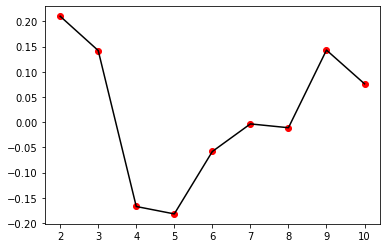

In [18]:
## linkage is single

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

scores=[]
i=0
clt=[]

for cl in range(2,11):
    single_cl=AgglomerativeClustering(n_clusters=cl,affinity='euclidean',linkage='single',compute_distances=True)
    single_cl_pred=single_cl.fit_predict(cr1)
    score=silhouette_score(cr1,single_cl_pred,metric='euclidean')
    scores.append(score)
    clt.append(cl)
    i=i+1
    
    
    if (score>=max(scores)):
        single_cl_score=round(score,4)
        single_cl_cluster=cl
    
    
print ("number of iteratons:", i)

print("Maximum silhouette score is {} for optimal number of cluseters {}.".format(single_cl_score,single_cl_cluster))


plt.plot(clt,scores,color="black")
plt.scatter(clt,scores,color="red")
plt.show() 



number of iteratons: 9
Maximum silhouette score is 0.4236 for optimal number of cluseters 2.


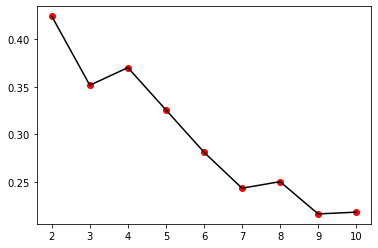

In [19]:
## linkage is average

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

scores=[]
i=0
clt=[]

for cl in range(2,11):
    average_cl=AgglomerativeClustering(n_clusters=cl,affinity='euclidean',linkage='average',compute_distances=True)
    average_cl_pred=average_cl.fit_predict(cr1)
    score=silhouette_score(cr1,average_cl_pred,metric='euclidean')
    scores.append(score)
    i=i+1
    clt.append(cl)
    
    if (score>=max(scores)):
        average_cl_score=round(score,4)
        average_cl_cluster=cl
    
    
print ("number of iteratons:", i)

print("Maximum silhouette score is {} for optimal number of cluseters {}.".format(average_cl_score,average_cl_cluster))


plt.plot(clt,scores,color="black")
plt.scatter(clt,scores,color="red")
plt.show() 

number of iteratons: 9
Maximum silhouette score is 0.4236 for optimal number of cluseters 2.


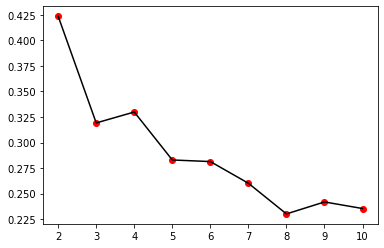

In [20]:
## linkage is ward

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

scores=[]
i=0
clt=[]

for cl in range(2,11):
    ward_cl=AgglomerativeClustering(n_clusters=cl,affinity='euclidean',linkage='ward',compute_distances=True)
    ward_cl_pred=ward_cl.fit_predict(cr1)
    score=silhouette_score(cr1,ward_cl_pred,metric='euclidean')
    scores.append(score)
    i=i+1
    clt.append(cl)
    
    if (score>=max(scores)):
        ward_cl_score=round(score,4)
        ward_cl_cluster=cl
    
    
print ("number of iteratons:", i)

print("Maximum silhouette score is {} for optimal number of cluseters {}.".format(ward_cl_score,ward_cl_cluster))



plt.plot(clt,scores,color="black")
plt.scatter(clt,scores,color="red")
plt.show()  

In [21]:
# the below tables shows number of customers in each cluster 

output1 = pd.DataFrame(data=comp_cl_pred)
output2 = pd.DataFrame(data=single_cl_pred)
output3 = pd.DataFrame(data=average_cl_pred)
output4 = pd.DataFrame(data=ward_cl_pred)

A=output1[0].value_counts(ascending=False)
B=output2[0].value_counts(ascending=False)
C=output3[0].value_counts(ascending=False)
D=output4[0].value_counts(ascending=False)

out=pd.concat([A,B,C,D], axis=1)
out.columns = ['Model A:complete', 'Model B:single', 'Model C:average', 'Model D:ward']
print(out)

   Model A:complete  Model B:single  Model C:average  Model D:ward
0                11               7               15             7
3                 9               1                2             5
6                 6               1                1             4
7                 5               1                3             4
8                 4               1                1             5
2                 4               7                2             8
4                 4               1               12             3
1                 3              29                9             9
5                 3               1                1             1
9                 1               1                4             4


    From the above data we can see the Model D and Model A is nicely balanced.
    The rest 2 models are skewed, we will not consider them.
    
    For best prediction we will go with the balanced model i.e Model D (Linkage is Ward) 


# Lets check method = Complete 

In [22]:
complete_cl=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
complete_cl_pred=complete_cl.fit_predict(cr1)

cr_comp=cr.copy()

cr_comp["Clusters"]= complete_cl_pred

cr_comp.head(10)

,US_States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [23]:
# the below tables shows number of customers in each cluster 

output1 = pd.DataFrame(data=complete_cl_pred)

D=output1[0].value_counts(ascending=False)

out=pd.concat([D], axis=1)
out.columns = [ 'Model D:complete']
print(out)

   Model D:complete
0                30
1                20


In [24]:
cr_comp.groupby(['Clusters']).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


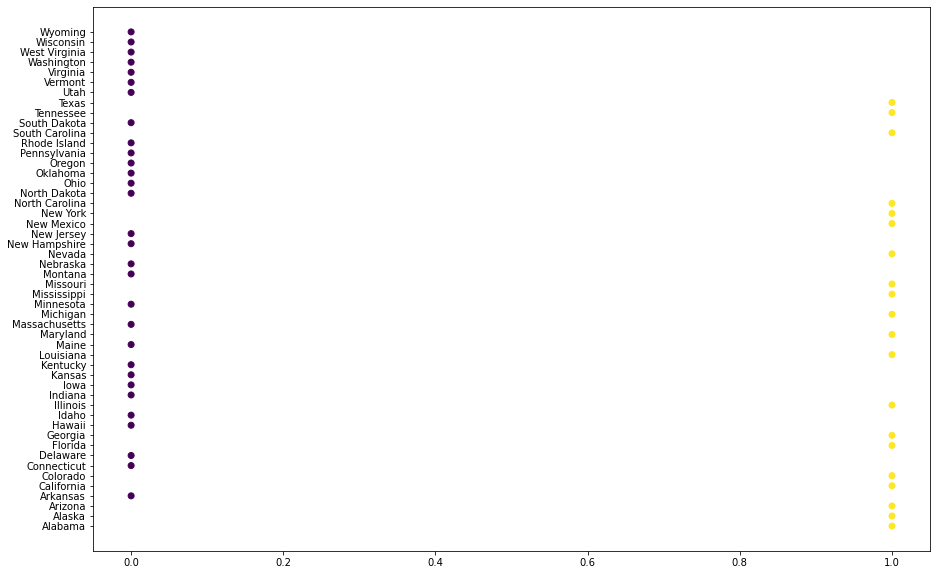

In [25]:
# Plot Clusters
plt.figure(figsize=(15, 10))  
plt.scatter(cr_comp['Clusters'],cr_comp['US_States'],c=complete_cl_pred) 

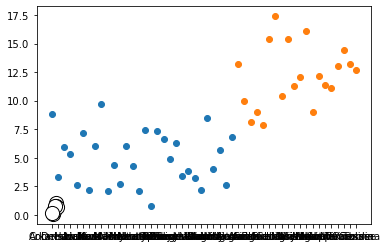

In [50]:
for i in set(complete_cl_pred):
    plt.scatter(cr_comp[cr_comp["Clusters"]==i].iloc[:,0],cr_comp[cr_comp["Clusters"]==i].iloc[:,1])



# Lets check method = Ward

In [27]:
ward_cl=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
ward_cl_pred=ward_cl.fit_predict(cr1)

cr_ward=cr.copy()

cr_ward["Clusters"]= ward_cl_pred

cr_ward.head(10)

,US_States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [28]:
# the below tables shows number of customers in each cluster 

output = pd.DataFrame(data=ward_cl_pred)

D=output[0].value_counts(ascending=False)

out=pd.concat([D], axis=1)
out.columns = [ 'Model D:Ward']
print(out)

   Model D:Ward
0            30
1            20


In [29]:
cr_comp.groupby(['Clusters']).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


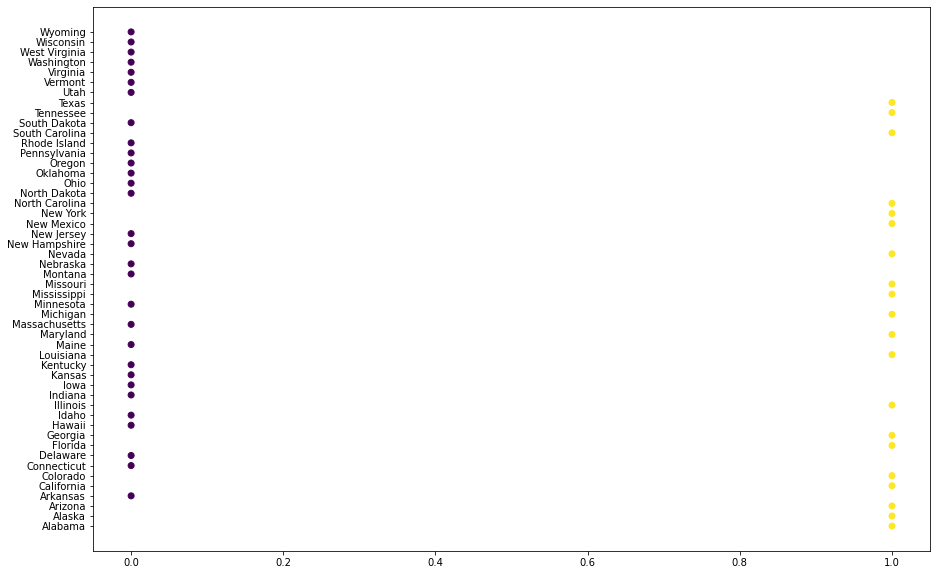

In [30]:
# Plot Clusters
plt.figure(figsize=(15, 10))  
plt.scatter(cr_comp['Clusters'],cr_comp['US_States'],c=ward_cl_pred)

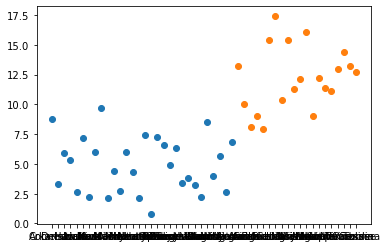

In [31]:
for i in set(ward_cl_pred):
    plt.scatter(cr_ward[cr_ward["Clusters"]==i].iloc[:,0],cr_ward[cr_ward["Clusters"]==i].iloc[:,1])

##### Both ward and complete method have same score and same cluster distribuitions 

# K- Means Clustering

In [32]:
from sklearn.cluster import KMeans


# Finding optimal number of clusters
iner = []
for cl in range(1, 12):
    kmeans = KMeans(n_clusters=cl,random_state=0)
    kmeans.fit(cr1)
    iner.append(kmeans.inertia_)

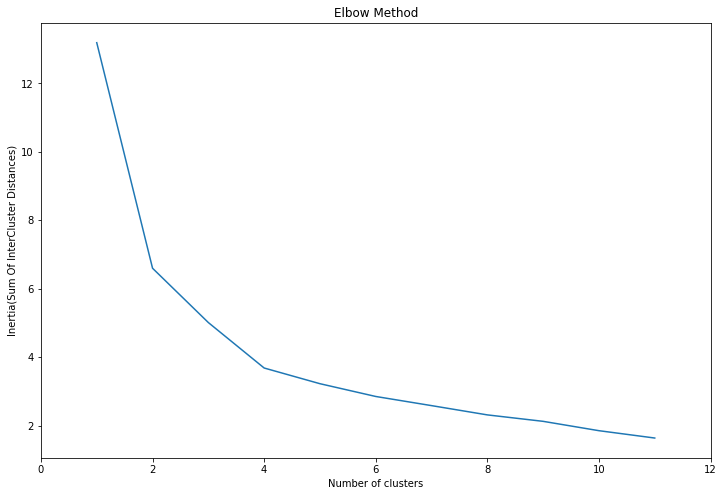

In [33]:
#plotting the graph
plt.figure(figsize=(12,8))    
plt.plot(range(1, 12), iner)
plt.title('Elbow Method')
plt.xlim(0,12)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia(Sum Of InterCluster Distances)')
plt.show()

    we will use n_cluster =2, 4 ( second best score) as we can see there is a sharp decline of values as point 2
    lets prove if optimal cluster is 2 using code

In [34]:
# iterating through various cluster

scores=[]
km_score=0
km_cluster=0
i=0
for cl in range(2,11):
    km= KMeans(n_clusters=cl, random_state=0)
    km_pred = km.fit_predict(cr1)
    score= silhouette_score (cr1, km_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        km_score=round(score,3)
        km_cluster=cl

print("Number of iterations:",i)
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(km_score,km_cluster))

Number of iterations: 9
Maximum silhouette score is 0.424 for optimal number of clusters-2.


## Below is graphical representation of all cluster with their centroid

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.31877550799979315
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.31047828422452584
For n_clusters = 6 The average silhouette_score is : 0.29304639988963094
For n_clusters = 7 The average silhouette_score is : 0.28821826266004197
For n_clusters = 8 The average silhouette_score is : 0.2739250289741456
For n_clusters = 9 The average silhouette_score is : 0.27503190107418374
For n_clusters = 10 The average silhouette_score is : 0.22700753572456023


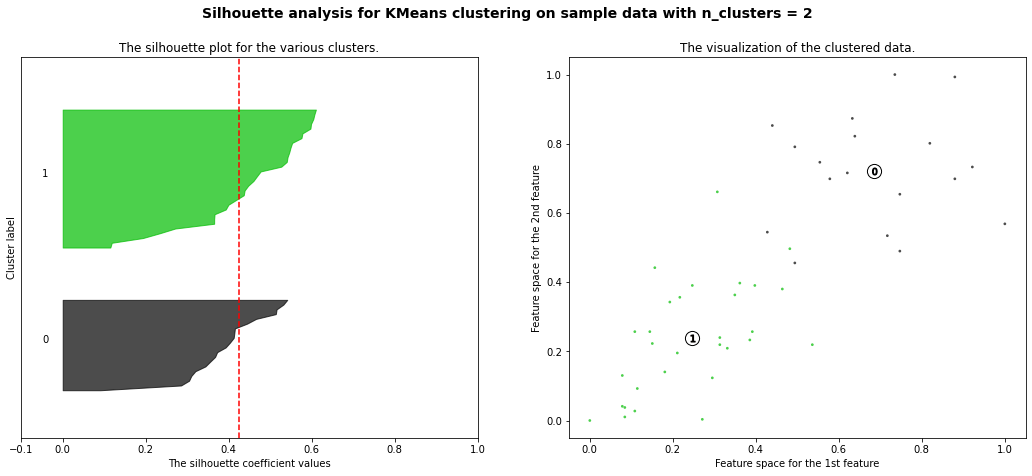

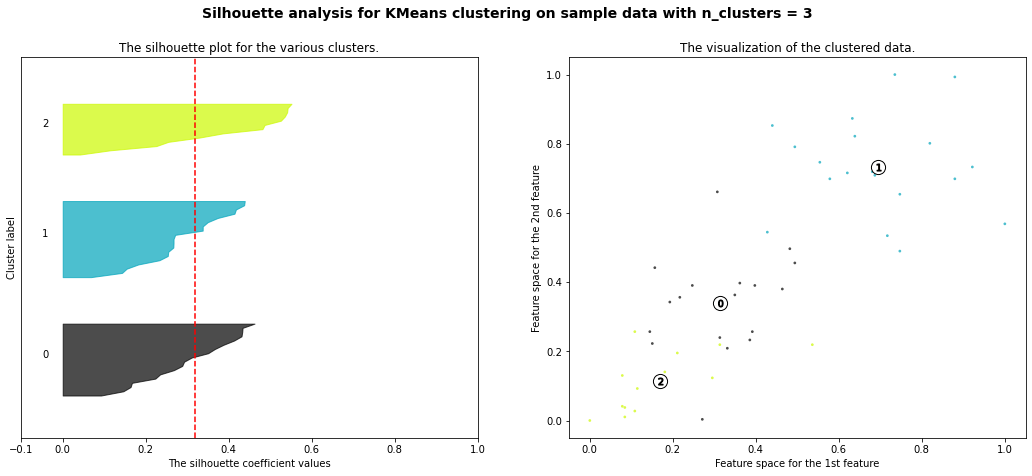

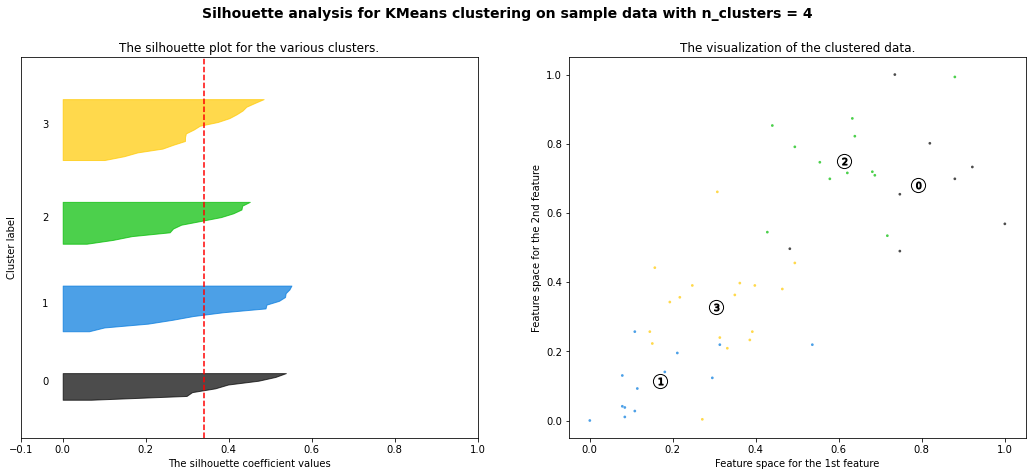

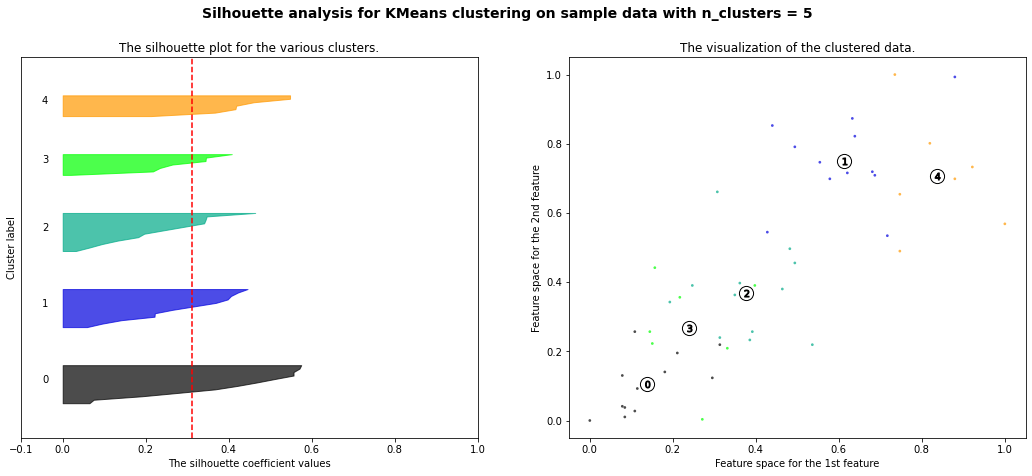

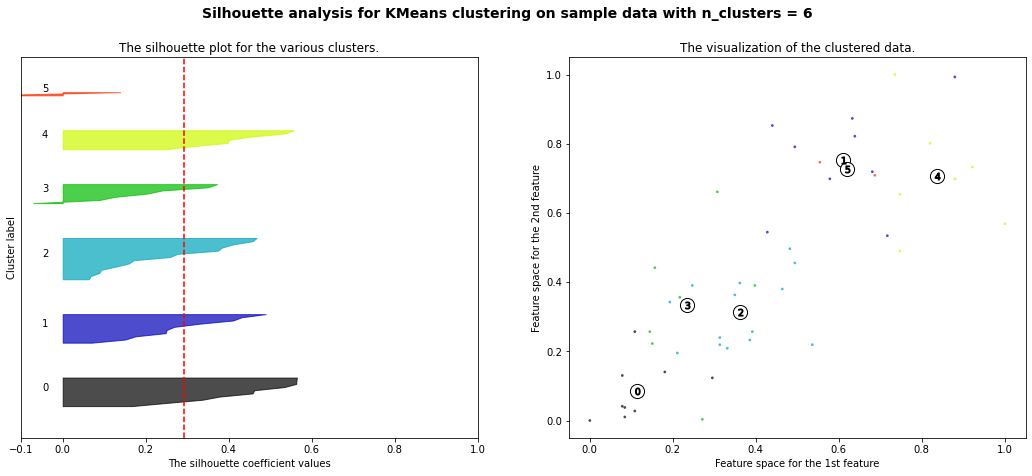

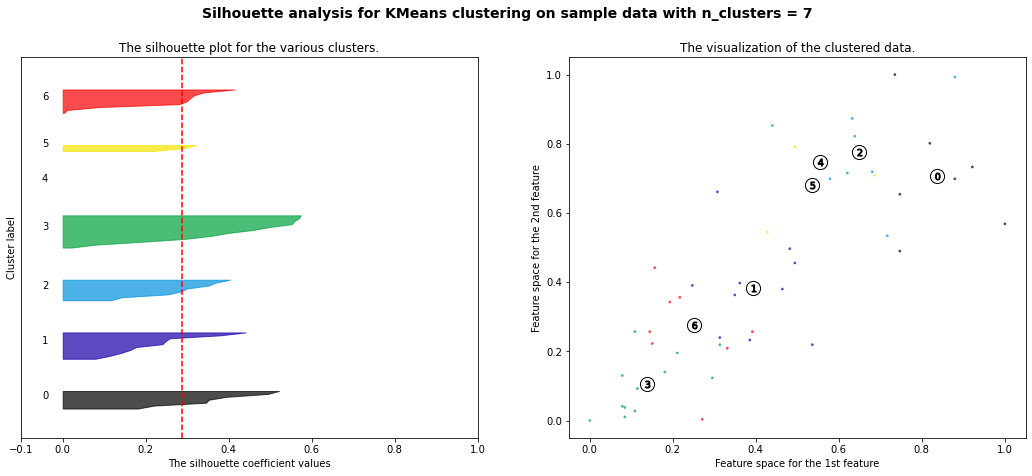

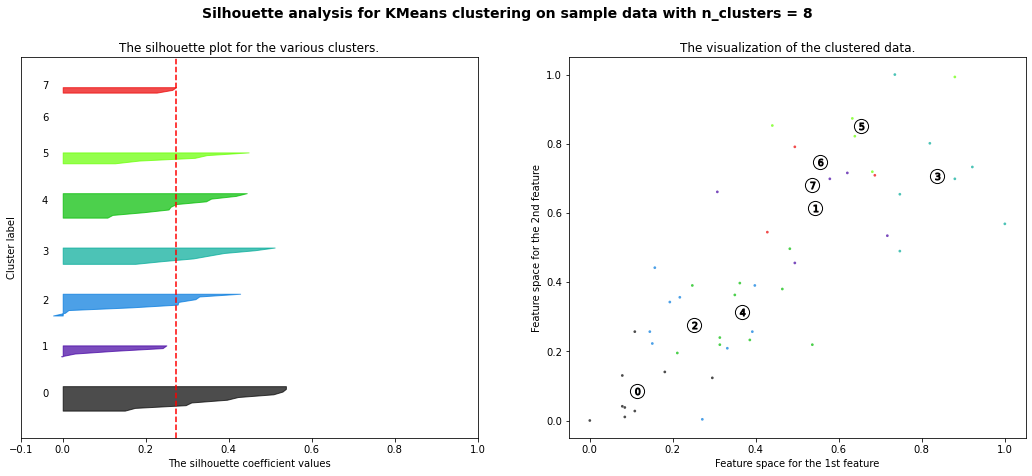

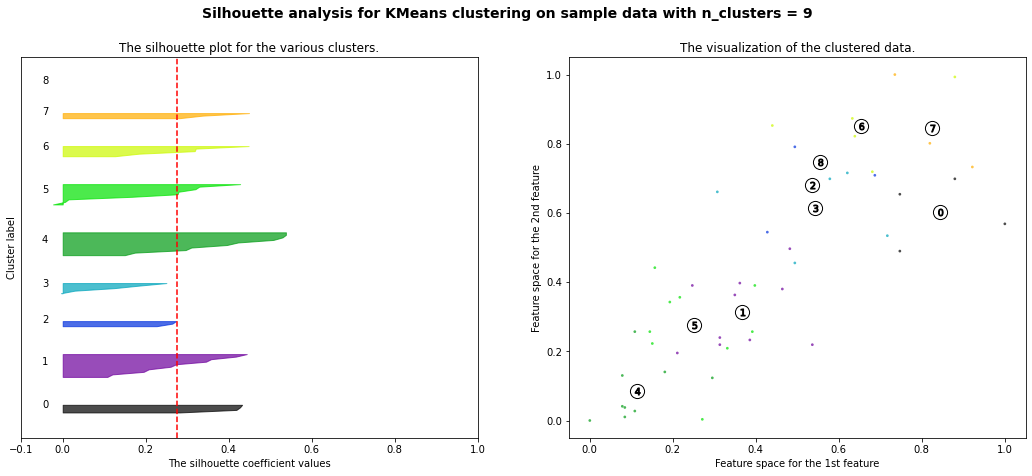

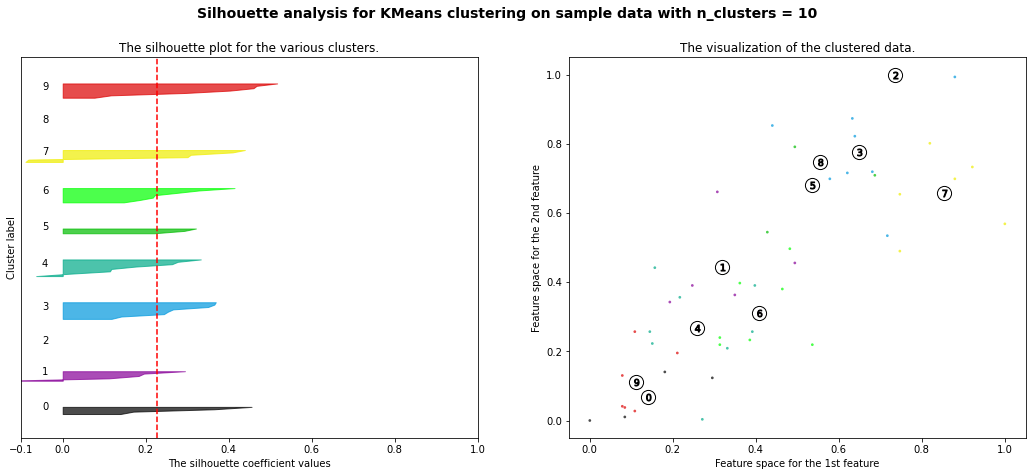

In [35]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cr1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cr1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cr1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cr1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(cr1.iloc[:, 0], cr1.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [36]:
kmeans_2 = KMeans(n_clusters=2,random_state=0)
kmeans_2_pred=kmeans_2.fit_predict(cr1)
score_2= silhouette_score (cr1, kmeans_2_pred, metric='euclidean')

print ("Silhoutte score is:", score_2 )

cr_km=cr.copy()

cr_km["Clusters"]= kmeans_2_pred

cr_km.head()




Silhoutte score is: 0.42364457559625074


,US_States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [37]:
# the below tables shows number of customers in each cluster 


output = pd.DataFrame(data=kmeans_2_pred)

D=output[0].value_counts(ascending=False)

out=pd.concat([D], axis=1)
out.columns = [ 'K means_2']
print(out)

   K means_2
0         30
1         20


In [38]:
cr_km.groupby(['Clusters']).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


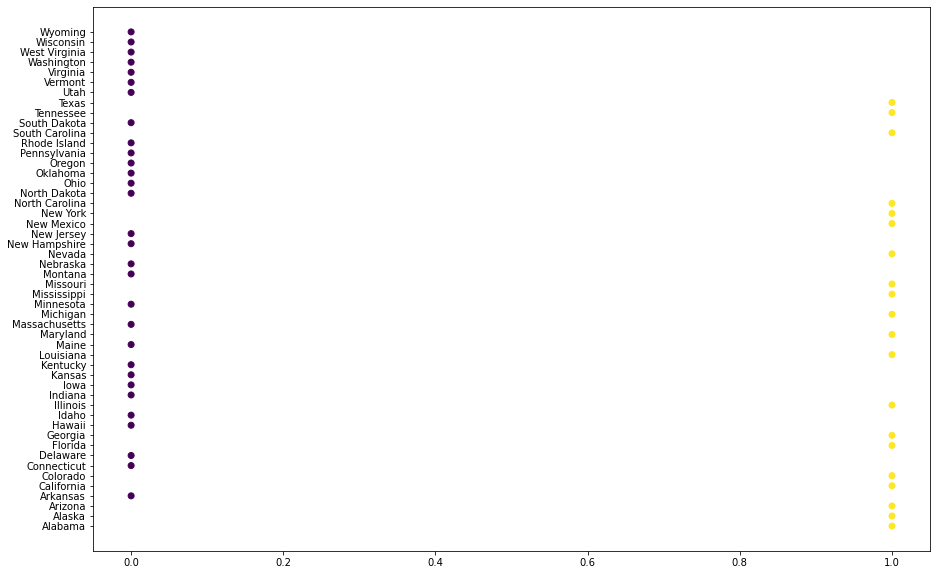

In [39]:
# Plot Clusters
plt.figure(figsize=(15, 10))  
plt.scatter(cr_km['Clusters'],cr_km['US_States'],c=kmeans_2_pred)

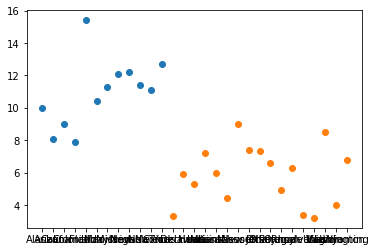

In [51]:
for i in set(complete_cl_pred):
    plt.scatter(cr_km[cr_km["Clusters"]==i].iloc[:,0],cr_km[cr_km["Clusters"]==i].iloc[:,1])

In [40]:
# checking for Cluster=4


kmeans_4 = KMeans(n_clusters=4,random_state=0)
kmeans_4_pred=kmeans_4.fit_predict(cr1)
score_4= silhouette_score (cr1, kmeans_4_pred, metric='euclidean')

print ("Silhoutte score is:", score_4 )




Silhoutte score is: 0.34089035600743633


In [52]:
cr_km_4=cr.copy()

cr_km_4["Clusters"]= kmeans_4_pred

cr_km_4.head()

,US_States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [53]:
# the below tables shows number of customers in each cluster 


output = pd.DataFrame(data=kmeans_4_pred)

D=output[0].value_counts(ascending=False)

out=pd.concat([D], axis=1)
out.columns = [ 'K means_4']
print(out)

   K means_4
1         17
3         13
0         12
2          8


In [54]:
cr_km_4.groupby(['Clusters']).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,10.966667,264.000000,76.500000,33.608333
1,5.852941,141.176471,73.647059,19.335294
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


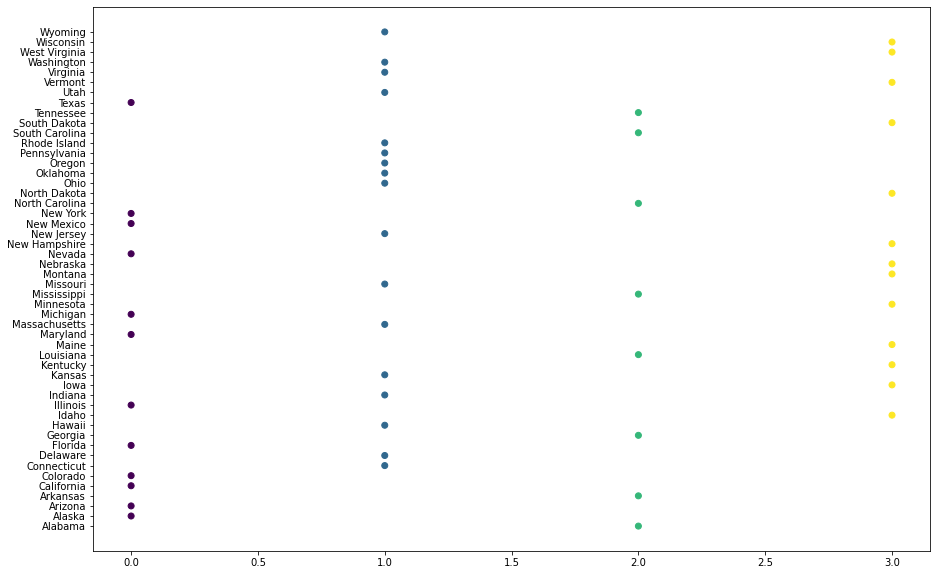

In [55]:
# Plot Clusters
plt.figure(figsize=(15, 10))  
plt.scatter(cr_km_4['Clusters'],cr_km_4['US_States'],c=kmeans_4_pred)

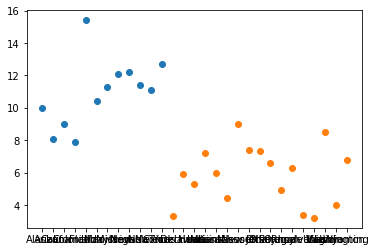

In [56]:
for i in set(complete_cl_pred):
    plt.scatter(cr_km_4[cr_km_4["Clusters"]==i].iloc[:,0],cr_km_4[cr_km_4["Clusters"]==i].iloc[:,1])

### As we can see teh silhoutte score for cluster= 2 is better than cluster=4

# DBscan clustering

## For DBSCAN clustering we will need
### i) ( min point)
    For dataset more than 2 Dimension , choose MinPts = 2*dim ( dim = dimenson of the data set).
    In this case we will start from 6 to a range of 22 with a incremental of 4 
### ii) Epsilon
    I have selected 6 as my minpoint , so going to alculate the average distance between each point in the data set and its 6 nearest neighbors 

In [45]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(cr1)
distances, indices = neighbors_fit.kneighbors(cr1)

In [46]:
distances[0:5],distances.shape

(array([[0.        , 0.19646763, 0.22136539, 0.23825846, 0.2943175 ,
         0.32288317],
        [0.        , 0.50447453, 0.51956614, 0.55866649, 0.57734462,
         0.58123796],
        [0.        , 0.26458421, 0.27892512, 0.27973121, 0.30490879,
         0.31219881],
        [0.        , 0.25152017, 0.25178413, 0.29643718, 0.33823425,
         0.33968976],
        [0.        , 0.30350213, 0.3209896 , 0.34080802, 0.37850561,
         0.41139393]]),
 (50, 6))

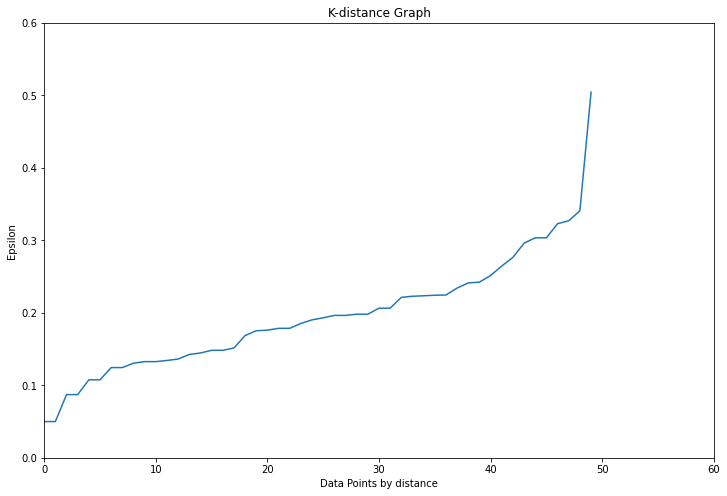

In [47]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
dist = distances[:,1]

plt.figure(figsize=(12,8))
plt.plot(dist)

plt.title('K-distance Graph',fontsize=12)
plt.xlabel('Data Points by distance',fontsize=10)
plt.xlim(0,60)
plt.ylim(0,.6)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature.

    In this case it is around .3
    
    Let's validate this via Code 

In [57]:
from sklearn.cluster import DBSCAN

scores=[]

i=0

for s in range(6,22,1):
    for e in np.arange(0.1,0.6,0.05):
        db=DBSCAN(eps=e,min_samples=s)
        db.fit(cr1)
        db_pred=db.fit_predict(cr1)
        l=len(set(db_pred))
              
        if(l>1):
            score= silhouette_score (cr1, db_pred, metric='euclidean')
            scores.append(score)
            i=i+1
                  
            if(score>=max(scores)):
            
                db_score=round(score,3)
                eps=round(e,3)
                samp=s

print("Number of iterations:",i)            

print("Maximum silhouette score is {} for minimum number of samples: {} and epsilon value : {}.".format(db_score,samp,eps))





Number of iterations: 77
Maximum silhouette score is 0.378 for minimum number of samples: 7 and epsilon value : 0.3.


In [58]:
db=DBSCAN(eps=0.3,min_samples=7)
db.fit(cr1)
db_pred=db.fit_predict(cr1)

In [59]:
db_df=cr.copy()
db_df['Clusters']=db_pred
db_df.head()

,US_States,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1


In [60]:
# the below tables shows number of customers in each cluster 


output = pd.DataFrame(data=db_pred)

D=output[0].value_counts(ascending=False)

out=pd.concat([D], axis=1)
out.columns = [ 'DBSCAN']
print(out)

    DBSCAN
 0      29
-1      21


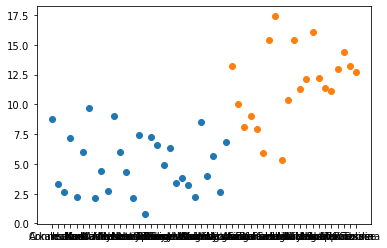

In [61]:
for i in set(db_pred):
    plt.scatter(db_df[db_df["Clusters"]==i].iloc[:,0],db_df[db_df["Clusters"]==i].iloc[:,1])

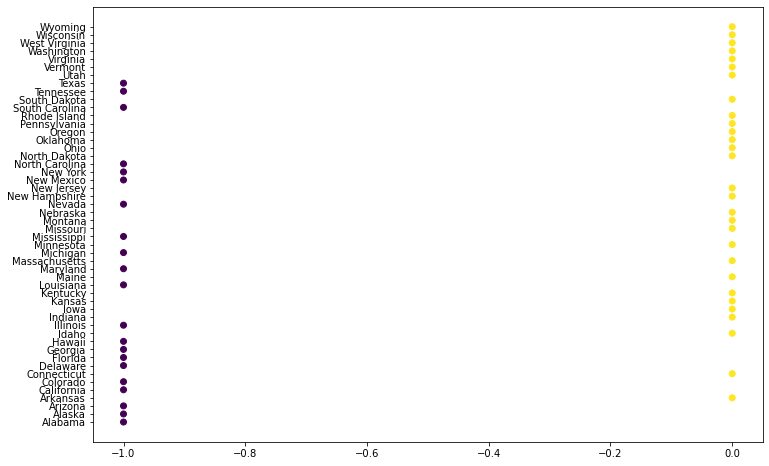

In [62]:
# Plot Clusters
plt.figure(figsize=(12, 8))  
plt.scatter(db_df['Clusters'],db_df['US_States'],c=db.labels_) 

In [63]:
results={'Clustering':['Hierarchical clustering','K-Means clustering_2','K-Means clustering_4','DBSCAN'],
   'Silhouette score':[ward_cl_score,km_score,score_4,db_score],
   'Clusters predicted':[ward_cl_cluster,km_cluster,4,2]}
clusters=pd.DataFrame(results)
clusters

,Clustering,Silhouette score,Clusters predicted
0,Hierarchical clustering,0.42360,2
1,K-Means clustering_2,0.42400,2
2,K-Means clustering_4,0.34089,4
3,DBSCAN,0.37800,2


### Hierarchical clustering and K-means both performing well with 2 clusters, we can go with any 1 of them